In [1]:
import serial
import time
from pymodbus.client import ModbusTcpClient
import json

In [2]:
# MQTT broker details
mqtt_host = "0.tcp.in.ngrok.io"
mqtt_port = "19731"
mqtt_user = ""
mqtt_password = ""
master_topic = "Modbus Data"  # Topic to publish messages

In [3]:
# Function to send AT command
def send_command(command):
    ser.write((command + '\r\n').encode())
    time.sleep(1)
    response = ser.read(ser.inWaiting()).decode()
    return response

In [4]:
# Function to connect to MQTT broker
def connect_to_mqtt(host, port, user, password):
    command = 'AT+CGATT=1'
    send_command(command)
    command = 'AT+CGDCONT=1,"IP","CMNET"'
    send_command(command)
    command = 'AT+CGACT=1,1'
    send_command(command)
    # Connect to MQTT broker using A9G board
    command = 'AT+MQTTCONN="{}",{},12345,120,0,"{}","{}"'.format(host, port, user, password)
    send_command(command)

In [5]:
# Function to publish message to MQTT broker
def publish_to_mqtt(topic, message):
    command = 'AT+MQTTPUB="{}","{}",0,0,0'.format(topic, message)
    send_command(command)

In [6]:
# Function to read holding register values from Modbus TCP device
def read_modbus_values(ip, port, address, count):
    client = ModbusTcpClient(ip, port)
    client.connect()
    result = client.read_holding_registers(address, count)
    client.close()
    return result.registers if hasattr(result, 'registers') else None

# Main code to Publish data in below format
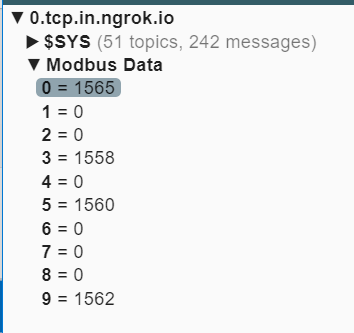

In [7]:
if __name__ == "__main__":
    # Open serial connection to the A9G module
    ser = serial.Serial('COM5', 115200, timeout=1)

    # Wait for the module to initialize
    time.sleep(2)

    try:

        # Connect to MQTT broker using A9G board
        connect_to_mqtt(mqtt_host, mqtt_port, mqtt_user, mqtt_password)

        # Modbus TCP device details
        modbus_ip = "127.0.0.1"
        modbus_port = 502
        holding_register_count = 10

        while True:
            # Read holding register values from Modbus TCP device
            values = read_modbus_values(modbus_ip, modbus_port, 0, holding_register_count)

            # Publish values to MQTT broker
            for i, value in enumerate(values):
                topic = "{}/{}".format(master_topic, i)
                publish_to_mqtt(topic, str(value))
                print("Published value {} to topic: {}".format(value, topic))

            time.sleep(10)  # Read and publish values every 10 seconds

    except KeyboardInterrupt:
        print("Exiting program.")

    # Close serial connection
    ser.close()

Published value 0 to topic: Modbus Data/0
Published value 0 to topic: Modbus Data/1
Published value 0 to topic: Modbus Data/2
Published value 0 to topic: Modbus Data/3
Published value 0 to topic: Modbus Data/4
Published value 0 to topic: Modbus Data/5
Published value 0 to topic: Modbus Data/6
Published value 0 to topic: Modbus Data/7
Published value 0 to topic: Modbus Data/8
Published value 0 to topic: Modbus Data/9
Published value 5 to topic: Modbus Data/0
Published value 0 to topic: Modbus Data/1
Published value 2 to topic: Modbus Data/2
Published value 0 to topic: Modbus Data/3
Published value 0 to topic: Modbus Data/4
Published value 0 to topic: Modbus Data/5
Published value 0 to topic: Modbus Data/6
Published value 0 to topic: Modbus Data/7
Published value 0 to topic: Modbus Data/8
Published value 0 to topic: Modbus Data/9
Published value 25 to topic: Modbus Data/0
Published value 0 to topic: Modbus Data/1
Published value 22 to topic: Modbus Data/2
Published value 0 to topic: Modb

# Main code to publish data in below format
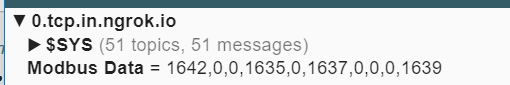

In [8]:
if __name__ == "__main__":
    # Open serial connection to the A9G module
    ser = serial.Serial('COM5', 115200, timeout=1)

    # Wait for the module to initialize
    time.sleep(2)

    try:
        # Connect to MQTT broker using A9G board
        connect_to_mqtt(mqtt_host, mqtt_port, mqtt_user, mqtt_password)

        # Modbus TCP device details
        modbus_ip = "127.0.0.1"
        modbus_port = 502
        holding_register_count = 10

        while True:
            # Read holding register values from Modbus TCP device
            values = read_modbus_values(modbus_ip, modbus_port, 0, holding_register_count)

            # Construct message containing all values
            message = ','.join(map(str, values))

            # Publish message to MQTT broker
            publish_to_mqtt(master_topic, message)
            print("Published message: {} to topic: {}".format(message, master_topic))

            time.sleep(1)  # Read and publish values every 10 seconds

    except KeyboardInterrupt:
        print("Exiting program.")

    # Close serial connection
    ser.close()

Published message: 154,0,151,0,147,0,145,0,143,0 to topic: Modbus Data
Published message: 156,0,153,0,149,0,147,0,145,0 to topic: Modbus Data
Published message: 158,0,155,0,151,0,149,0,147,0 to topic: Modbus Data
Published message: 160,0,157,0,153,0,151,0,149,0 to topic: Modbus Data
Published message: 162,0,159,0,155,0,153,0,151,0 to topic: Modbus Data
Published message: 164,0,161,0,157,0,155,0,153,0 to topic: Modbus Data
Published message: 166,0,163,0,159,0,157,0,155,0 to topic: Modbus Data
Published message: 168,0,165,0,161,0,159,0,157,0 to topic: Modbus Data
Published message: 170,0,167,0,163,0,161,0,159,0 to topic: Modbus Data
Published message: 172,0,169,0,165,0,163,0,161,0 to topic: Modbus Data
Published message: 174,0,171,0,167,0,165,0,163,0 to topic: Modbus Data
Published message: 176,0,173,0,169,0,167,0,165,0 to topic: Modbus Data
Published message: 178,0,175,0,171,0,169,0,167,0 to topic: Modbus Data
Published message: 180,0,177,0,173,0,171,0,169,0 to topic: Modbus Data
Publis

# Main code to Publish Data in below Format

{'Register_0': 1431, 'Register_1': 0, 'Register_2': 0, 'Register_3': 1424, 'Register_4': 0, 'Register_5': 1426, 'Register_6': 0, 'Register_7': 0, 'Register_8': 0, 'Register_9': 1428}

In [10]:
if __name__ == "__main__":
    # Open serial connection to the A9G module
    ser = serial.Serial('COM5', 115200, timeout=1)

    # Wait for the module to initialize
    time.sleep(2)

    try:

        # Connect to MQTT broker using A9G board
        connect_to_mqtt(mqtt_host, mqtt_port, mqtt_user, mqtt_password)

        # Modbus TCP device details
        modbus_ip = "127.0.0.1"
        modbus_port = 502
        holding_register_count = 10

        while True:
            # Read holding register values from Modbus TCP device
            values = read_modbus_values(modbus_ip, modbus_port, 0, holding_register_count)

            # Construct JSON message
            json_data = {f"Register_{i}": values[i] for i in range(holding_register_count)}

            # Convert JSON to string
            json_message = json.dumps(json_data)

            # Publish JSON message to MQTT broker
            publish_to_mqtt(master_topic, str(json_data))
            print("Published message: {} to topic: {}".format(json_message, master_topic))

            time.sleep(2)  # Read and publish values every 10 seconds
            
    except KeyboardInterrupt:
        print("Exiting program.")

    # Close serial connection
    ser.close()

Published message: {"Register_0": 279, "Register_1": 95, "Register_2": 276, "Register_3": 0, "Register_4": 272, "Register_5": 0, "Register_6": 270, "Register_7": 0, "Register_8": 268, "Register_9": 0} to topic: Modbus Data
Published message: {"Register_0": 282, "Register_1": 98, "Register_2": 279, "Register_3": 0, "Register_4": 275, "Register_5": 0, "Register_6": 273, "Register_7": 0, "Register_8": 271, "Register_9": 0} to topic: Modbus Data
Published message: {"Register_0": 285, "Register_1": 101, "Register_2": 282, "Register_3": 0, "Register_4": 278, "Register_5": 0, "Register_6": 276, "Register_7": 0, "Register_8": 274, "Register_9": 0} to topic: Modbus Data
Published message: {"Register_0": 288, "Register_1": 104, "Register_2": 285, "Register_3": 0, "Register_4": 281, "Register_5": 0, "Register_6": 279, "Register_7": 0, "Register_8": 277, "Register_9": 0} to topic: Modbus Data
Published message: {"Register_0": 291, "Register_1": 107, "Register_2": 288, "Register_3": 0, "Register_4"

Connection to (127.0.0.1, 502) failed: [WinError 10061] No connection could be made because the target machine actively refused it
Connection to (127.0.0.1, 502) failed: [WinError 10061] No connection could be made because the target machine actively refused it


ConnectionException: Modbus Error: [Connection] Failed to connect[ModbusTcpClient 127.0.0.1:502]